# Project Feature and Model Selection - Concrete Strength Prediction

**Author: Pablo Ulises Hernandez Garces**

**link Github: https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-apr20-UlisesHdzG**


**Objective**

To predict the concrete strength using the data available in file concrete_data.xls. Apply feature engineering and model tuning to obtain 80% to 95% of R2score. 
 
**Resources Available**

The data for this project is available in file http://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

The same has been shared along with the course content. 
 
**Attribute Information:**

Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database. 
 
 
 
| Name | Data Type | Measurement | Description |
| :-: | :-: | :-: | :-: |
| Cement (cement) | quantitative | kg in a m3 mixture | Input Variable|
| Blast Furnace Slag (slag) | quantitative | kg in a m3 mixture | Input Variable |
| Fly Ash (ash) | quantitative | kg in a m3 mixture | Input Variable |
| Water (water) | quantitative | kg in a m3 mixture | Input Variable |
| Superplasticizer (superplastic) | quantitative | kg in a m3 mixture | Input Variable |
| Coarse Aggregate (coarseagg) | quantitative | kg in a m3 mixture | Input Variable |
| Fine Aggregate (fineagg) | quantitative | kg in a m3 mixture | Input Variable |
| Age(age) | quantitative | Day (1~365) | Input Variable |
| Concrete compressive strength(strength) | quantitative | MPa | Output Variable |

In [1]:
# Libraries required
import pandas as pd                                             # library for working with dataframes
import numpy as np                                              # library for working with arrays
import matplotlib.pyplot as plt                                 # low level visualization library
%matplotlib inline
import seaborn as sns                                           # higher level visualization library compared to matplotlib

from sklearn.model_selection import train_test_split #split the data into train and test
from sklearn import preprocessing # for standardizarion

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn import metrics #see the error parameters
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures


# Update default style and size of charts
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10, 8]

data = pd.read_csv('concrete.csv')

## Steps and Tasks: 
 
**Exploratory data quality report reflecting the following:**

**1. Univariate analysis** – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers (10 Marks) 

In [2]:
# Univariate analysis. Checking data types, number of unique values, statistics, missing values and outliers
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


From above output, apparentely, there are not missing values. This has to be verified by reviewing the values of each variable, looking for a possible error in the data (inconsistent data, error in capturing data, etc.).

Additionally, we have only numeric  variables.

In [3]:
# are there duplicated rows?
print("Number of duplicated rows:")
print(data[data.duplicated()].shape[0])

print("Percentage of duplicated rows:")
print(round(data[data.duplicated()].shape[0]/data.shape[0]*100,2))

# number of unique values in each variable
data.nunique()

Number of duplicated rows:
25
Percentage of duplicated rows:
2.43


cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

We can see that there are 25 observations duplicated and this represents 2.43% out of total observations in the data set. It is not useful to have duplicated rows so I will drop them and work with unique observations.

In [4]:
data=data[~data.duplicated()]
data.shape

(1005, 9)

Now we have 1005 unique observations.

In [5]:
# unique values
for i in data.columns:
    print(i)
    print(data[i].unique())
    print()

cement
[141.3 168.9 250.  266.  154.8 255.  166.8 251.4 296.  155.  151.8 173.
 385.  237.5 167.  213.8 336.  190.7 312.7 229.7 228.  236.  132.  331.
 310.  304.  425.  166.1 339.  475.  145.7 313.  178.  165.  277.2 325.
 194.7 246.8 382.  149.  531.3 387.  193.5 326.  337.9 200.  218.9 234.
 309.9 350.  182.  480.  295.7 233.8 379.5 332.5 237.  238.1 323.7 342.
 388.6 147.8 290.4 500.  284.  218.2 190.3 116.  277.  376.  273.  212.5
 362.6 275.1 139.6 427.5 183.9 318.8 252.  149.5 540.  380.  436.  281.
 151.6 326.5 397.  238.  158.6 302.  192.  155.6 160.  222.4 251.8 213.5
 446.  133.  122.6 290.2 375.  181.4 298.2 162.  262.  213.7 313.3 322.
 173.5 299.8 198.6 286.3 349.  520.  252.1 255.5 172.4 212.1 276.  393.
 230.  389.9 157.  359.  374.  102.  202.  252.3 336.5 315.  159.  231.8
 159.8 164.6 136.4 190.  184.  424.  212.  156.  136.  203.5 254.  220.8
 167.4 144.  108.3 214.9 469.  522.  250.2 439.  322.5 153.  525.  259.9
 236.9 366.  333.  145.9 277.1 166.  143.  181.9 450

In [6]:
#Now let's check basic statistics of the numeric variables.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,278.631343,104.344261,102.00,190.70,265.0,349.00,540.0
slag,1005.0,72.043483,86.170807,0.00,0.00,20.0,142.50,359.4
ash,1005.0,55.536318,64.207969,0.00,0.00,0.0,118.30,200.1
water,1005.0,182.075323,21.339334,121.80,166.60,185.7,192.90,247.0
superplastic,1005.0,6.033234,5.919967,0.00,0.00,6.1,10.00,32.2
coarseagg,1005.0,974.376816,77.579667,801.00,932.00,968.0,1031.00,1145.0
fineagg,1005.0,772.688259,80.340435,594.00,724.30,780.0,822.20,992.6
age,1005.0,45.856716,63.734692,1.00,7.00,28.0,56.00,365.0
strength,1005.0,35.250378,16.284815,2.33,23.52,33.8,44.87,82.6


From the above summary we can see that cement, slag, ash, coarseagg, age and strength have positively skewed distributions. The rest of variables seem to be almost simetrical or with a low negative skewness. Additionally, the variables "ash", "slag" and "superplastic" have a lot of zeros in their distributions. In the case of ash at least 50% of te distribution are zeros, in the other cases is at least 25% of zeros in the distributions. Let's check the number of zeros per variable.

In [7]:
# Number of zeros in the distributions
print("Number of zeros per variable and proportion")
for i in data.columns:
    aux=sum(data[i]==0)
    print(i,":",aux,"|",round(100*aux/data.shape[0],2))

Number of zeros per variable and proportion
cement : 0 | 0.0
slag : 470 | 46.77
ash : 541 | 53.83
water : 0 | 0.0
superplastic : 378 | 37.61
coarseagg : 0 | 0.0
fineagg : 0 | 0.0
age : 0 | 0.0
strength : 0 | 0.0


From above results we can see that "slag", "ash" and "superplastic" variables have a lot of zeros with 46.77%, 53.83% and 37.61% of the total observations, respectively. In this step, it is necessary to have enough knowledge on this topic in order to assess whether these proportions of zeros are acceptable or normal. In order to continue with the analysis of this problem I will let these proportions as they are (no imputation will be perform).
Let's see their distributions

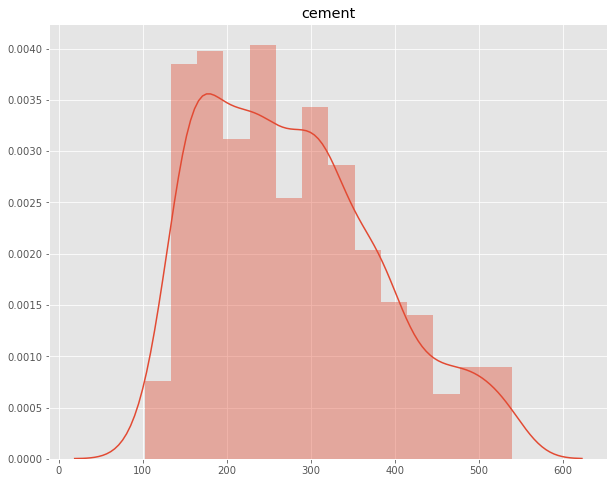

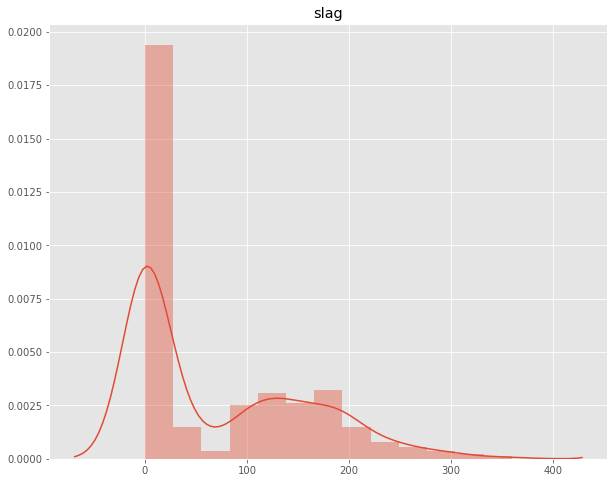

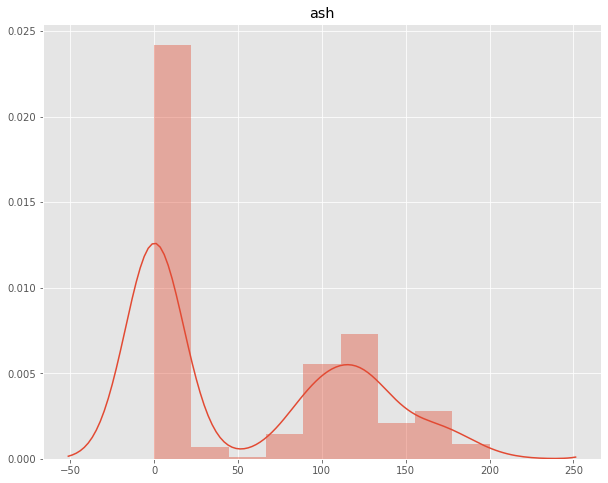

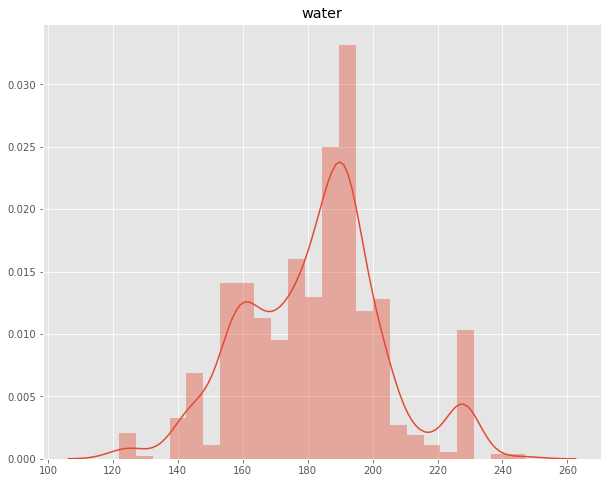

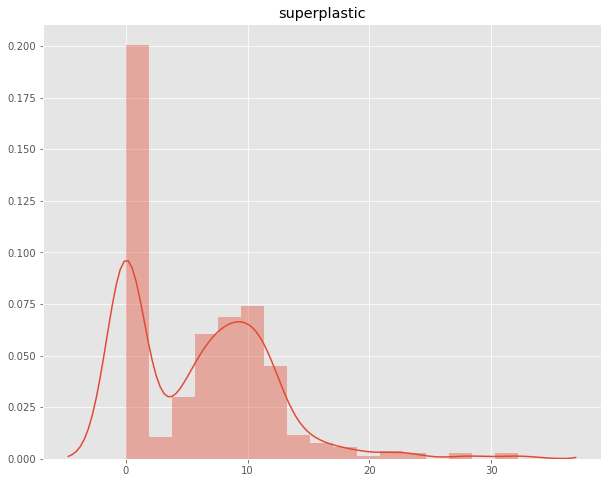

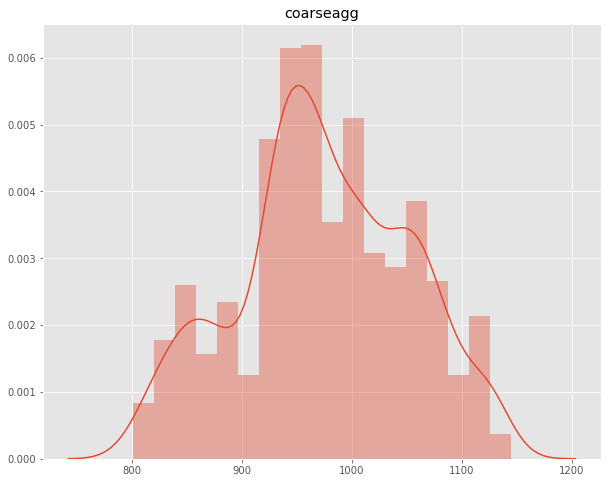

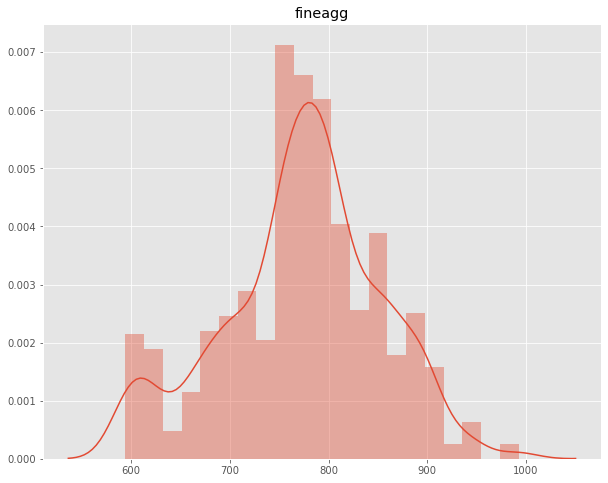

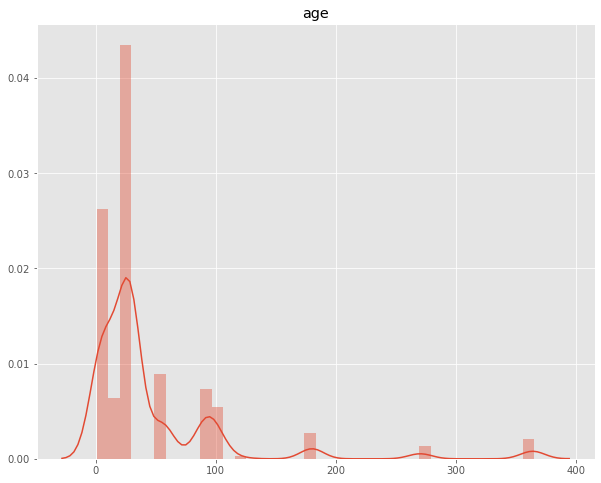

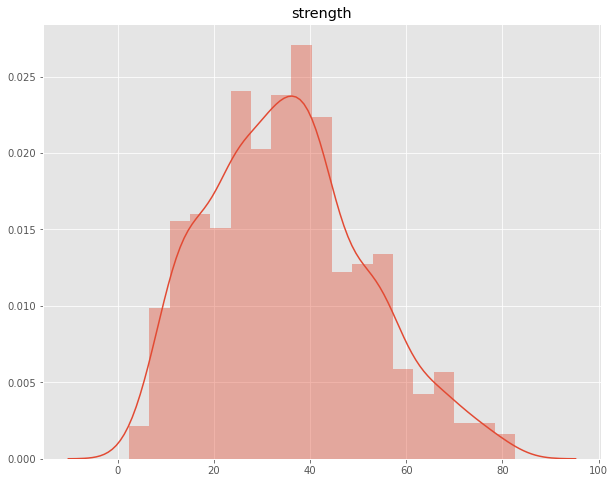

In [8]:
# Univariate plots

# plots for continous variables
for i in data.columns:
    sns.distplot(data[[i]],kde=True)
    plt.title(i)
    plt.show()

From the graphs of the distributions of variables we can confirm the right skewness of most of the variables, in some of them it is small but in others is high. Additionally, all variables except "strength" and "cement" have clearly multimodal distributions, with 2 or 3 modes.

In [9]:
# Skewness
data.skew()

cement          0.564959
slag            0.855225
ash             0.497231
water           0.034433
superplastic    0.980604
coarseagg      -0.065256
fineagg        -0.252353
age             3.253974
strength        0.395696
dtype: float64

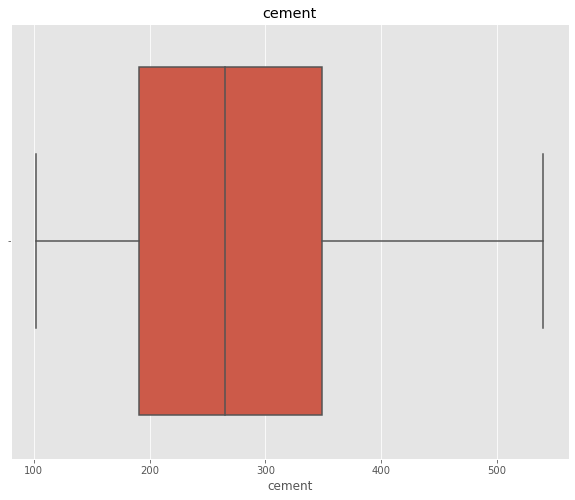

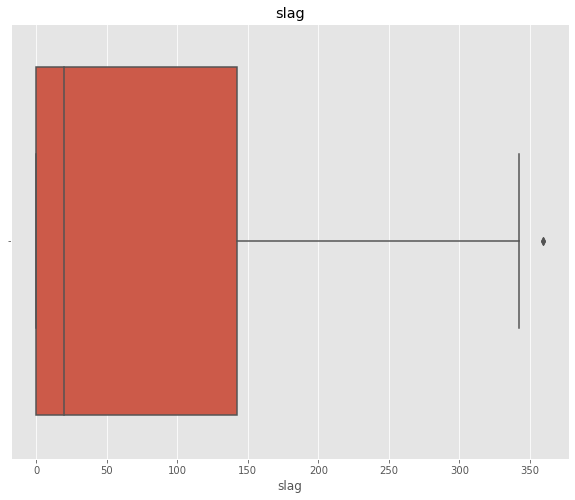

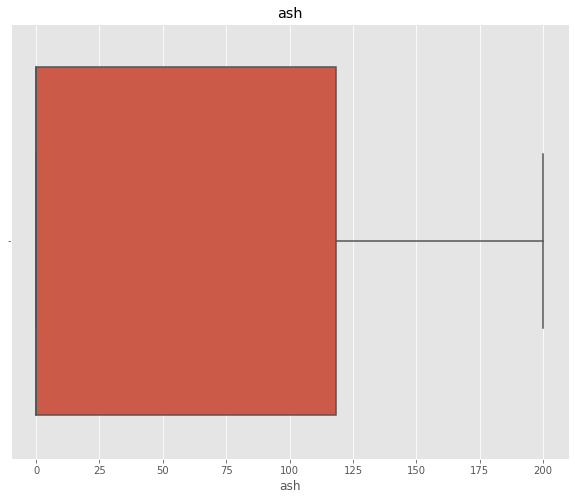

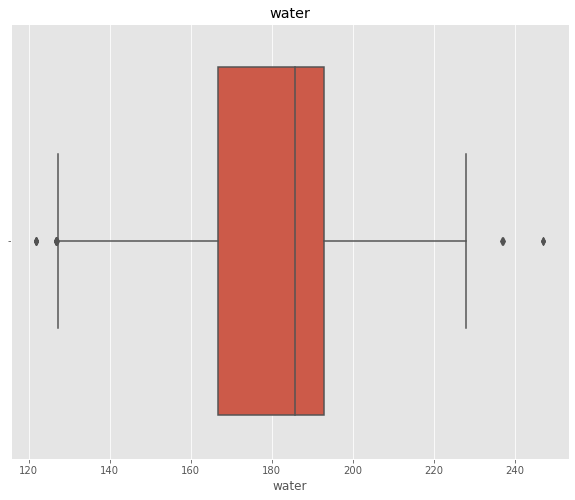

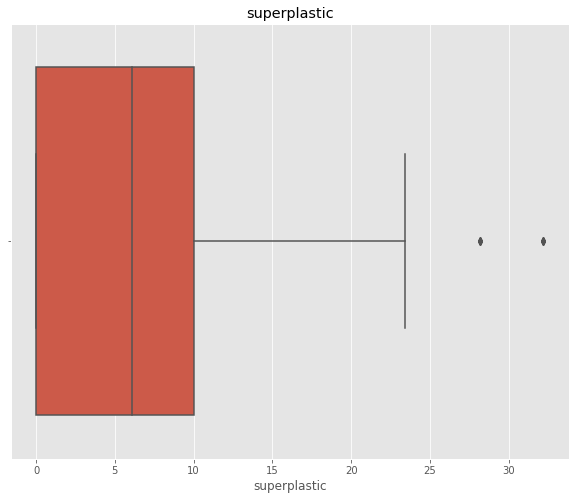

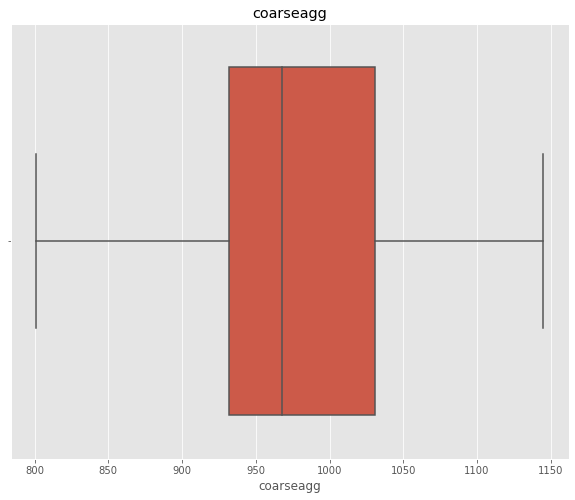

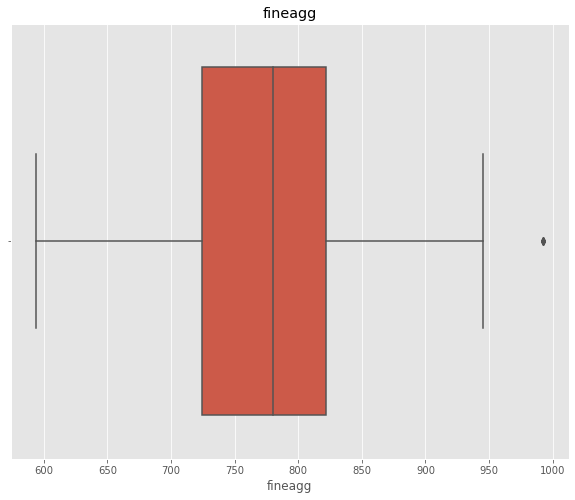

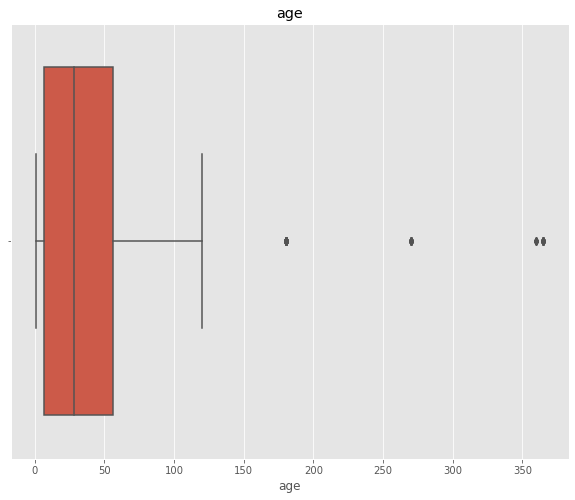

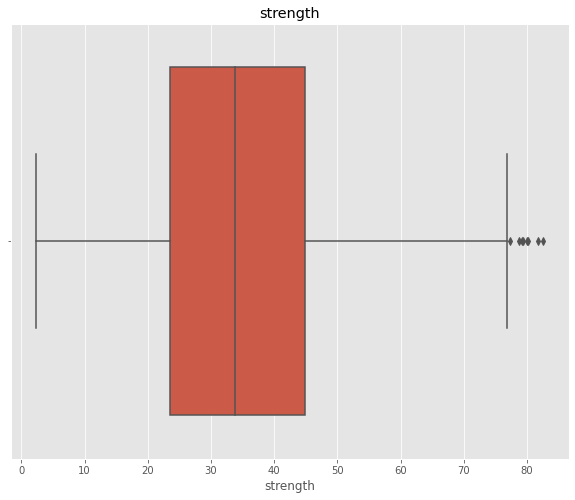

In [10]:
# Finally, we check outliers through boxplots
for i in data.columns:
    sns.boxplot(data[i])
    plt.title(i)
    plt.show()

From the boxplots we can see that exists outliers in six variables. However, there are very few outliers per variable, this would not be a big problem in our model because of the proportion that those outliers represent, so in this step I will let them as they are and depending on the results of the first model I could handle this issue through imputating the outliers with the "mean" or "median".

**2. Bi-variate analysis** between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. (10 marks) 

                cement      slag       ash     water  superplastic  coarseagg  \
cement        1.000000 -0.303324 -0.385610 -0.056625      0.060906  -0.086205   
slag         -0.303324  1.000000 -0.312352  0.130262      0.019800  -0.277559   
ash          -0.385610 -0.312352  1.000000 -0.283314      0.414213  -0.026468   
water        -0.056625  0.130262 -0.283314  1.000000     -0.646946  -0.212480   
superplastic  0.060906  0.019800  0.414213 -0.646946      1.000000  -0.241721   
coarseagg    -0.086205 -0.277559 -0.026468 -0.212480     -0.241721   1.000000   
fineagg      -0.245375 -0.289685  0.090262 -0.444915      0.207993  -0.162187   
age           0.086348 -0.042759 -0.158940  0.279284     -0.194076  -0.005264   
strength      0.488283  0.103374 -0.080648 -0.269624      0.344209  -0.144717   

               fineagg       age  strength  
cement       -0.245375  0.086348  0.488283  
slag         -0.289685 -0.042759  0.103374  
ash           0.090262 -0.158940 -0.080648  
water    

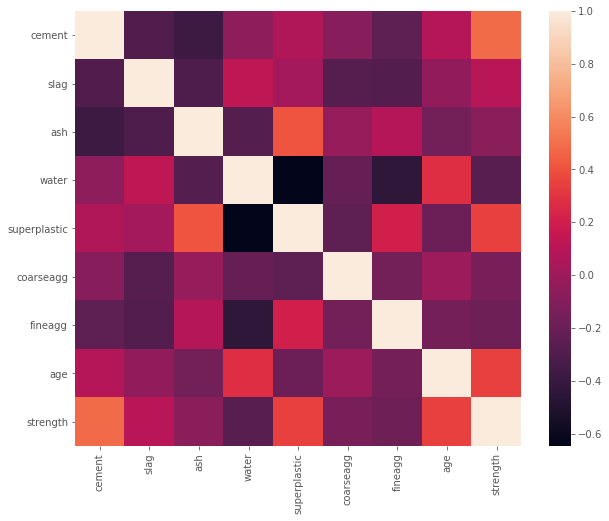

In [11]:
# Correlation between variables
print(data.corr())
sns.heatmap(data.corr())

From above results we can see that there are no strong correlation neither positive nor negative between the variables. The biggest correlation is about -.647 between "superplastic" and "water", the rest of them can be considered as weak correlation. With respect to the relation between output and input variables, the highest correlation is with cement (.488) followed by superplastic(.344) and age(.337). In this sense we can keep all variables. i.e. There is not a multicollinearity problem.

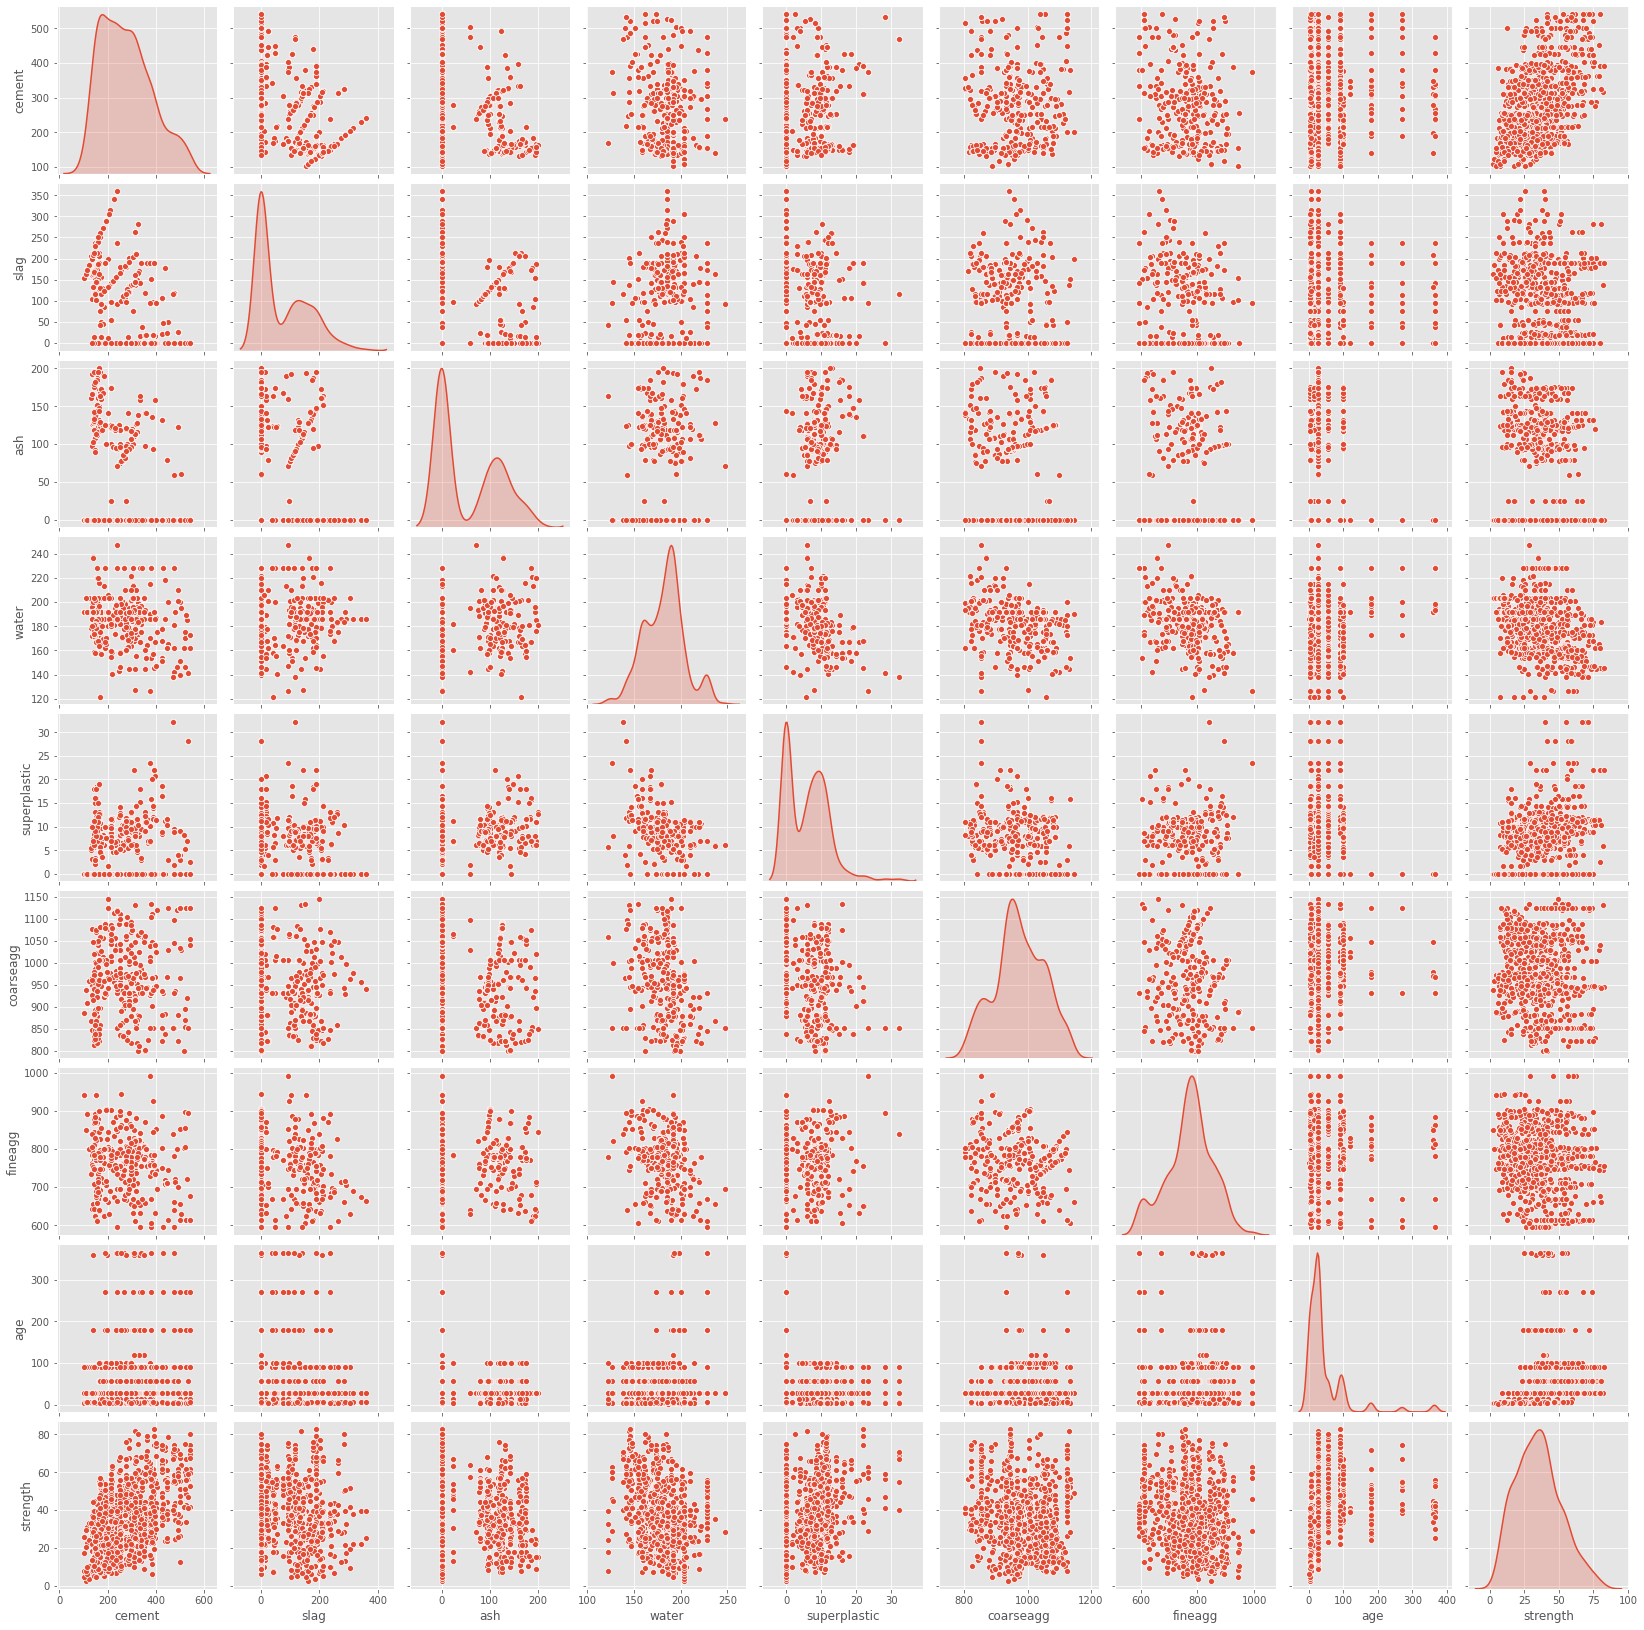

In [12]:
# plotting continuous variables using pairplot
sns.pairplot(data,diag_kind="kde")

We can see the relationship between all variables. Graphically we can confirm the low correlation that exist between the output and the rest of variables. 

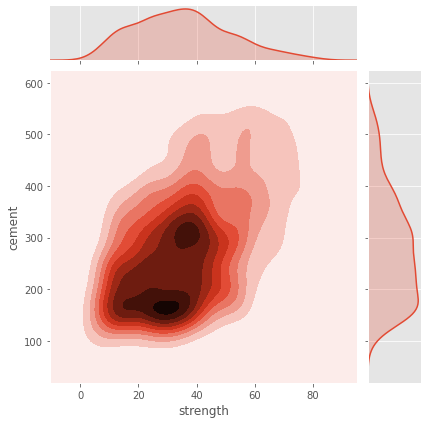

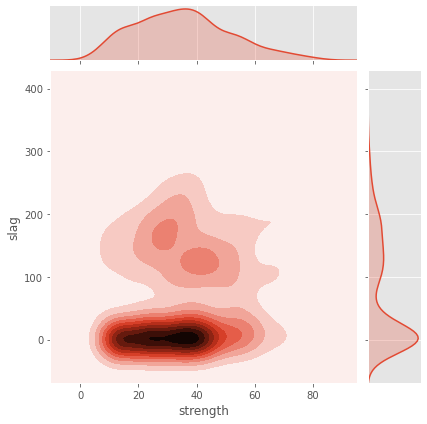

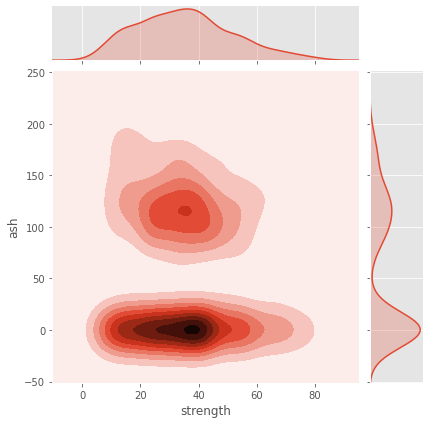

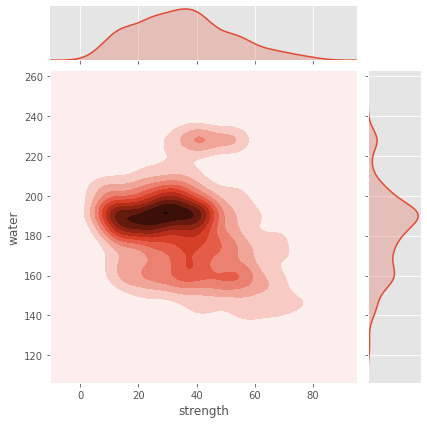

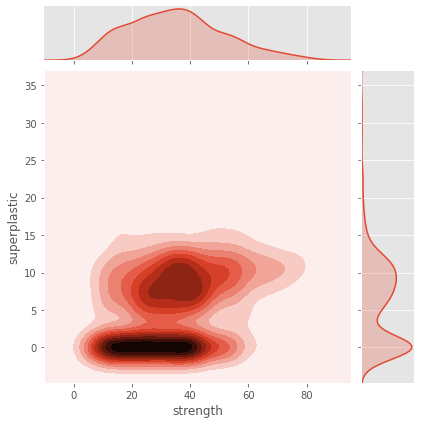

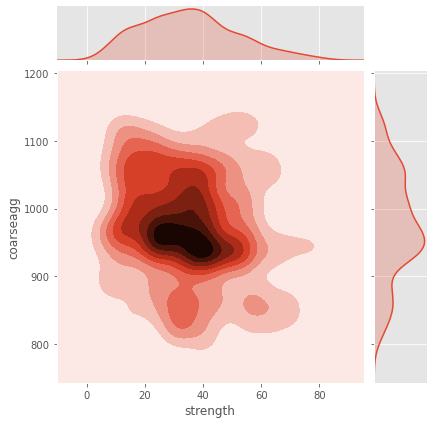

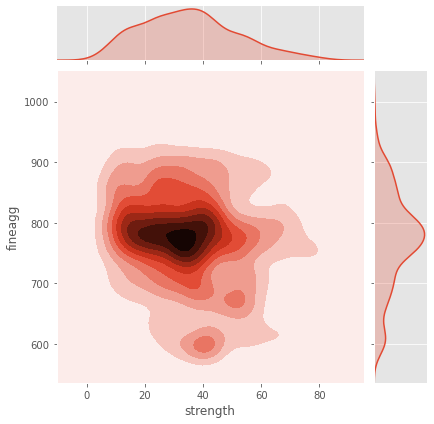

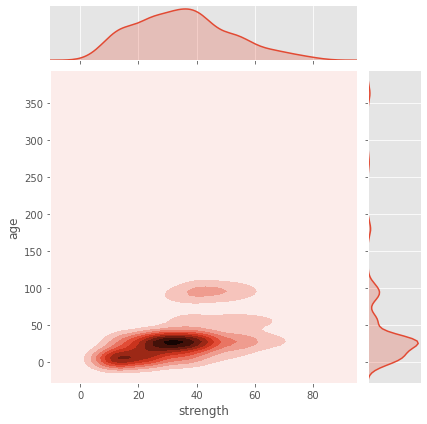

In [13]:
var = data.columns[data.columns!="strength"]
for i in var:
    sns.jointplot(x="strength", y=i, data=data, kind="kde");
    plt.show();

From the bivariate distributions of the "Strength" and the rest of variables we can see that all of them are multimodal and with no evident linear relation

**3. Feature Engineering techniques (10 marks)**
   - Identify opportunities (if any) to extract a new feature from existing features, drop a feature (if required) 
   - Get data model ready and do a train test split. 
   - Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree. 

One opportunity in the data is that we can improve the skewness of the distributions through a log-transformation.

In [14]:
# applying log-transformation in order to have more simetrical distributions
# We have variables that have 0-values, so the entire transformation will be: log(x+1)
data_log=(data+1).transform(np.log)
data_log.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,5.563180,0.379024,4.634729,5.255932,5.583496,5.857933,6.293419
slag,1005.0,2.497571,2.409584,0.000000,0.000000,3.044522,4.966335,5.887215
ash,1005.0,2.191579,2.380101,0.000000,0.000000,0.000000,4.781641,5.303802
water,1005.0,5.202979,0.118489,4.810557,5.121580,5.229503,5.267343,5.513429
superplastic,1005.0,1.427328,1.152635,0.000000,0.000000,1.960095,2.397895,3.502550
coarseagg,1005.0,6.879628,0.080249,6.687109,6.838405,6.876265,6.939254,7.044033
fineagg,1005.0,6.645600,0.106608,6.388561,6.586585,6.660575,6.713199,6.901335
age,1005.0,3.244973,1.108951,0.693147,2.079442,3.367296,4.043051,5.902633
strength,1005.0,3.471211,0.522703,1.202972,3.199489,3.549617,3.825811,4.426044


In [15]:
# Skewness
print("Inicial Skewness:")
print(data.skew())
print()
print("Log-transfomed data Skewness:")
print(data_log.skew())

Inicial Skewness:
cement          0.564959
slag            0.855225
ash             0.497231
water           0.034433
superplastic    0.980604
coarseagg      -0.065256
fineagg        -0.252353
age             3.253974
strength        0.395696
dtype: float64

Log-transfomed data Skewness:
cement         -0.086423
slag            0.011239
ash             0.181734
water          -0.352457
superplastic   -0.290697
coarseagg      -0.236282
fineagg        -0.537469
age             0.005713
strength       -0.800368
dtype: float64


We can see that the skewness of each variable is much less, in some cases, after the log transformation. 

**Splitingt data into X and Y**

Now, I will introduce interactions between independent variables in order to assess how well all pair combinations of variables can perform in our model.Then, my model will have an order two of complexity.

In [16]:
# Splitting data into X and Y
X = data_log[data_log.columns[data_log.columns!="strength"]]
y = data_log[["strength"]]

In [17]:
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
X=poly.fit_transform(X)

Now I will split data into training, validation and test sets. The proportion will be test:25, train:75. And of that 75 of training set, the validation will be 25 of it.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

**Creating the model and tuning it:**
1. Algorithms that you think will be suitable for this project (at least 3 algorithms). Use Kfold Cross Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (15 marks) 

I will fit 6 regression models in order to assess wich fits better. I will consider a simple linear regression, Lasso Regression, Ridge regresion and ensemble technieques such as Random Forest Regression, AdaBoost Regression and GradientBoost regression. With all these models I will use 10-fold cross validation to evaluate model performance.

In [19]:
# K-fold CV
kfold = KFold(n_splits=10, random_state=1)


# Simple regression model
regression_model = LinearRegression()
res_reg = cross_val_score(regression_model, X_train, y_train, cv=kfold, scoring='r2')


# Ridge regression model with alpha=.3
ridge = Ridge(alpha=.3)
res_ridge = cross_val_score(ridge, X_train, y_train, cv=kfold, scoring='r2')

# Lasso regression model with alpha=.3
lasso = Lasso(alpha=0.01)
res_lasso = cross_val_score(lasso, X_train, y_train, cv=kfold, scoring='r2')

# Random forest regressor
rfr = RandomForestRegressor()
res_rfr = cross_val_score(rfr, X_train, y_train, cv=kfold, scoring='r2')

# AdaBoost regressor
ada_r = AdaBoostRegressor()
res_adaR = cross_val_score(ada_r, X_train, y_train, cv=kfold, scoring='r2')

# GradientBoost regressor
grad_r = GradientBoostingRegressor()
res_gradR = cross_val_score(grad_r, X_train, y_train, cv=kfold, scoring='r2')


C:\Users\amiel\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\amiel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4690394894539196, tolerance: 0.014630097984563552
  positive)
C:\Users\amiel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7455389007846271, tolerance: 0.015321162814217894
  positive)
C:\Users\amiel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number 

C:\Users\amiel\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\amiel\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\amiel\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\amiel\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

In [20]:
# Scores of the models
results= pd.DataFrame([{"Model":"Linear Regression","Mean R^2":res_reg.mean()},
                       {"Model":"Ridge Regression","Mean R^2":res_ridge.mean()},
                       {"Model":"Lasso Regression","Mean R^2":res_lasso.mean()},
                       {"Model":"Random Forest Regression","Mean R^2":res_rfr.mean()},
                       {"Model":"AdaBoost Regression","Mean R^2":res_adaR.mean()},
                       {"Model":"GradientBoost Regression","Mean R^2":res_gradR.mean()}
                      ])
print("Scores of each model")
results.sort_values(by="Mean R^2",ascending=False)



Scores of each model


,Model,Mean R^2
5,GradientBoost Regression,0.909390
3,Random Forest Regression,0.894303
0,Linear Regression,0.863847
1,Ridge Regression,0.856408
4,AdaBoost Regression,0.835859
2,Lasso Regression,0.827133


From above table we can see that for training set all models perform well with an R^2>82%. However I will keep first 3 to implement some hyperparameters tunning. For these 3 models I will plot their erros in training set in order to verify graphically if exists homoscedasticity.

C:\Users\amiel\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\amiel\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


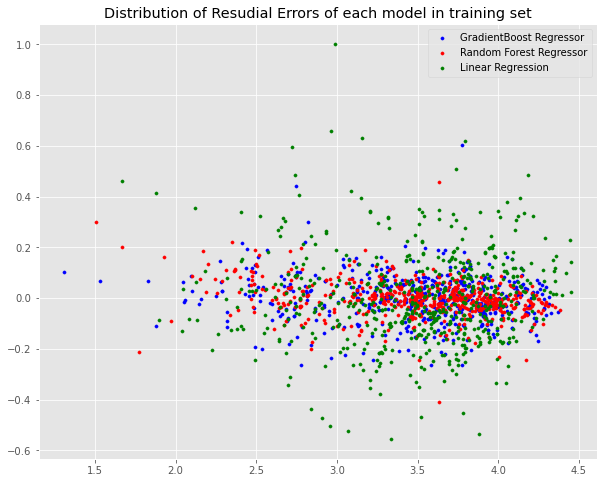

In [21]:
## plotting residual errors in training data  for GradientBoost, Random Forest and Linear Regression.

regression_model.fit(X_train,y_train)
rfr.fit(X_train,y_train)
grad_r.fit(X_train,y_train)

# GradientBoost
plt.scatter(grad_r.predict(X_train), grad_r.predict(X_train) - y_train.strength, 
            color = "blue", s = 10, label = 'GradientBoost Regressor');

# Random Forest
plt.scatter(rfr.predict(X_train), rfr.predict(X_train) - y_train.strength, 
            color = "red", s = 10, label = 'Random Forest Regressor');

# Linear Regression
plt.scatter(regression_model.predict(X_train), regression_model.predict(X_train) - y_train, 
            color = "green", s = 10, label = 'Linear Regression');
  

plt.title("Distribution of Resudial Errors of each model in training set");
plt.legend(loc = 'upper right');
plt.show();

From the scatterplot we can see that there are homoscedasticity in the distribution of the residual errors of each model (GradientBoosting, RandomForest and Linear Regression). This can be said because there are not a clear agrupation or tendency in the residual error plots. Moreover, there exists statistical tests such as  Breusch-Pagan and Goldfeld-Quandt which have a null hypothesis of homoscedasticity, however, these tests exceed the scope of the project and I will left here the analysis of homoscedasticity.

2. Techniques employed to squeeze that extra performance out of the model without making it over fit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (15 marks)

I will use GridSearchCV on validation test in order to optimize hyperparameters of the three models I choosed.

In [22]:
# Hyperparameter tunning using GridSearch CV with default 5-fold cross validation

param_grid_gradR = {'learning_rate': (0.1,0.3,0.5),
                    'max_depth': (3,5,7),
                   'criterion':('friedman_mse', 'mse', 'mae')}

param_grid_rfr = {'n_estimators': (100,150,200),
                   'max_depth': (3,5,7),
                   'criterion':('mse', 'mae')}

param_grid_reg = {'fit_intercept': (True,False),
                  'normalize': (True,False)}

# fitting gridSearch CV on Validation Test

# GradBoost
grid_search_gradR = GridSearchCV(grad_r, param_grid=param_grid_gradR,n_jobs=3)
grid_search_gradR.fit(X_val, y_val)

# RandomForest
grid_search_rfr = GridSearchCV(rfr, param_grid=param_grid_rfr,n_jobs=3)
grid_search_rfr.fit(X_val, y_val)

# Linear Regression
grid_search_reg = GridSearchCV(regression_model, param_grid=param_grid_reg,n_jobs=3)
grid_search_reg.fit(X_val, y_val)

C:\Users\amiel\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\amiel\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(estimator=LinearRegression(), n_jobs=3,
             param_grid={'fit_intercept': (True, False),
                         'normalize': (True, False)})

In [23]:
# Extracting the best combination of parameters
print("Best hyperparameter combinations")
# AdaBoost
print(grid_search_gradR.best_params_)

# Random Forest
print(grid_search_rfr.best_params_)

# Linear regression
print(grid_search_reg.best_params_)

Best hyperparameter combinations
{'criterion': 'mae', 'learning_rate': 0.1, 'max_depth': 3}
{'criterion': 'mse', 'max_depth': 7, 'n_estimators': 200}
{'fit_intercept': True, 'normalize': True}


Now, I have obtained the best combination of hyperparameters for the selected models. Now, lets check their performance with cross validation in my training set

In [24]:
# using the new hyperparameters in our models

# GradientBoost regressor
grad_r2 = GradientBoostingRegressor(criterion='mae', learning_rate= 0.1, max_depth= 3)
res_gradR_2 = cross_val_score(grad_r2, X_train, y_train, cv=kfold, scoring='r2')

# Random forest regressor
rfr2 = RandomForestRegressor(criterion='mse', max_depth= 7, n_estimators= 200)
res_rfr2 = cross_val_score(rfr2, X_train, y_train, cv=kfold, scoring='r2')

# Simple regression model
regression_model2 = LinearRegression(fit_intercept= True, normalize= True)
res_reg2 = cross_val_score(regression_model2, X_train, y_train, cv=kfold, scoring='r2')


C:\Users\amiel\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\amiel\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\amiel\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\amiel\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

In [25]:
# Scores of the models with best hyperparameters
results= pd.DataFrame([{"Model":"Linear Regression","Mean R^2":res_reg2.mean()},
                       {"Model":"Random Forest Regression","Mean R^2":res_rfr2.mean()},
                       {"Model":"GradientBoost Regression","Mean R^2":res_gradR_2.mean()}
                      ])
print("Scores of each model with the best combination of hyperparameters")
results.sort_values(by="Mean R^2",ascending=False)


Scores of each model with the best combination of hyperparameters


,Model,Mean R^2
2,GradientBoost Regression,0.899155
1,Random Forest Regression,0.883363
0,Linear Regression,0.863847


C:\Users\amiel\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\amiel\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


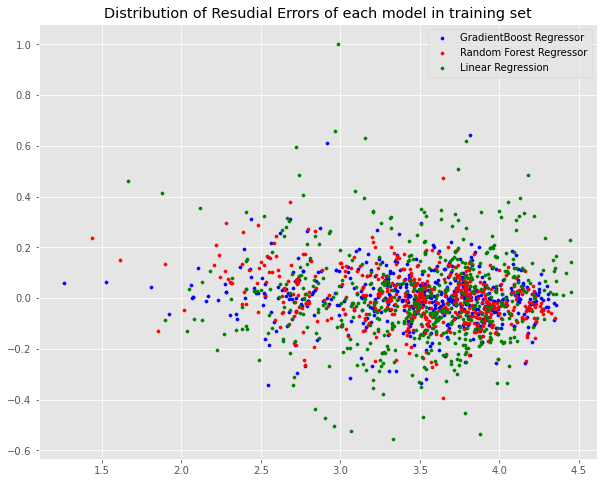

In [26]:
## plotting residual errors in training data  for GradientBoost, Random Forest and Linear Regression.

regression_model2.fit(X_train,y_train)
rfr2.fit(X_train,y_train)
grad_r2.fit(X_train,y_train)

# GradientBoost
plt.scatter(grad_r2.predict(X_train), grad_r2.predict(X_train) - y_train.strength, 
            color = "blue", s = 10, label = 'GradientBoost Regressor');

# Random Forest
plt.scatter(rfr2.predict(X_train), rfr2.predict(X_train) - y_train.strength, 
            color = "red", s = 10, label = 'Random Forest Regressor');

# Linear Regression
plt.scatter(regression_model2.predict(X_train), regression_model2.predict(X_train) - y_train, 
            color = "green", s = 10, label = 'Linear Regression');
  

plt.title("Distribution of Resudial Errors of each model in training set");
plt.legend(loc = 'upper right');
plt.show();

We can see that the performance of the models are pretty good and their plots of the residual errors look with homoscedasticity. Finally, I will fit my models in my test set in order to check their performance and checking that there is not overfitting.

In [27]:
# Scores of the models with best hyperparameters in test data


results_final= pd.DataFrame([{"Model":"Linear Regression","R^2":regression_model2.score(X_test,y_test)},
                       {"Model":"Random Forest Regression","R^2":rfr2.score(X_test,y_test)},
                       {"Model":"GradientBoost Regression","R^2":grad_r2.score(X_test,y_test)}
                      ])
print("Scores in test set of each model with the best combination of hyperparameters")
print(results_final.sort_values(by="R^2",ascending=False))

print("Scores in training set of each model with the best combination of hyperparameters")
print(results.sort_values(by="Mean R^2",ascending=False))

Scores in test set of each model with the best combination of hyperparameters
                      Model       R^2
2  GradientBoost Regression  0.889110
1  Random Forest Regression  0.868883
0         Linear Regression  0.836951
Scores in training set of each model with the best combination of hyperparameters
                      Model  Mean R^2
2  GradientBoost Regression  0.899155
1  Random Forest Regression  0.883363
0         Linear Regression  0.863847


We can see that scores in both training and test sets are pretty close to each other. So, ther is no a clear evidence of overfitting in neither model. The best model in predicting the strength of concrete is GradienBoost.

Finally, I will plot the residuals of the test set.

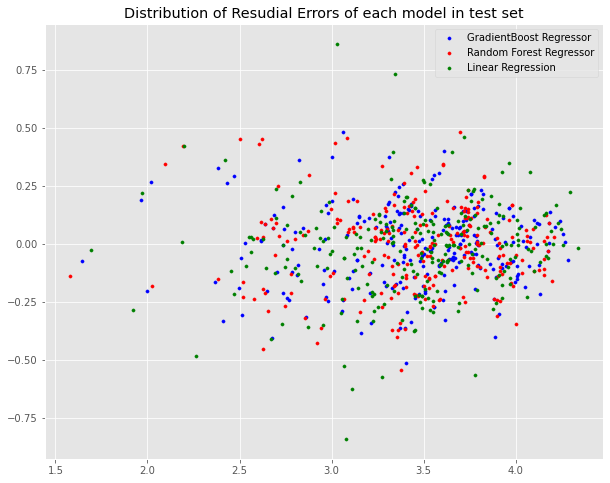

In [28]:
## plotting residual errors in training data  for GradientBoost, Random Forest and Linear Regression.

# GradientBoost
plt.scatter(grad_r2.predict(X_test), grad_r2.predict(X_test) - y_test.strength, 
            color = "blue", s = 10, label = 'GradientBoost Regressor');

# Random Forest
plt.scatter(rfr2.predict(X_test), rfr2.predict(X_test) - y_test.strength, 
            color = "red", s = 10, label = 'Random Forest Regressor');

# Linear Regression
plt.scatter(regression_model2.predict(X_test), regression_model2.predict(X_test) - y_test, 
            color = "green", s = 10, label = 'Linear Regression');
  

plt.title("Distribution of Resudial Errors of each model in test set");
plt.legend(loc = 'upper right');
plt.show();

All residual errors of the models looks without evidence of heteroscedasticity. So, I can select GradientBoost Regressor as my best model, followed by Random Forest and Linear Regression. My models have an R^2>83% in both training and testing sets, therefore I would be able to make more inferences in the case of study. An important thing that has to be mentioned is that the interaction between variables really matters.